In [1]:
import pandas as pd
import os

from maca import clean_annotation, clean_labels

metadata_folder = os.path.join('..', 'metadata' )

annotation_folder = os.path.join(metadata_folder, 'manual_annotations')
# annotation_folder

summary_folder = os.path.join(metadata_folder, 'summary')
! mkdir $summary_folder


mkdir: ../metadata/summary: File exists


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='whitegrid', context='paper')

/Users/olgabot/anaconda3/envs/maca/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
csv = os.path.join(metadata_folder, 'maca_3month_annotations_plates.csv')

cell_annotations = pd.read_csv(csv, index_col=0)
print(cell_annotations.shape)
cell_annotations.head()

(42192, 5)


,annotation,plate.barcode,subannotation,tissue,annotation_subannotation
A21.MAA000594.3_8_M.1.1,fibroblasts,MAA000594,NaN,Aorta,fibroblasts
F8.MAA000594.3_8_M.1.1,unknown,MAA000594,NaN,Aorta,unknown
H11.MAA000594.3_8_M.1.1,unknown,MAA000594,NaN,Aorta,unknown
A22.MAA000594.3_8_M.1.1,unknown,MAA000594,NaN,Aorta,unknown
H12.MAA000594.3_8_M.1.1,adipocytes,MAA000594,NaN,Aorta,adipocytes


Make sure there's no `stromal_mesenchymal_stem_cell_cells`

In [4]:
cell_annotations.query('tissue == "Thymus"').groupby('annotation').size()

annotation
stromal_stem      33
t_cells         1250
dtype: int64

In [5]:
figure_folder = '/Users/olgabot/googledrive/MACA_3mo_manuscript/Main figures'

figure1_folder = f'{figure_folder}/figure1/plates'
figure2_folder = f'{figure_folder}/figure2/plates'

print(f'figure1_folder: "{figure1_folder}"')
print(f'figure2_folder: "{figure2_folder}"')

! mkdir -p "$figure1_folder"
! mkdir -p "$figure2_folder"

figure1_folder: "/Users/olgabot/googledrive/MACA_3mo_manuscript/Main figures/figure1/plates"
figure2_folder: "/Users/olgabot/googledrive/MACA_3mo_manuscript/Main figures/figure2/plates"


In [6]:
folder = os.path.join(metadata_folder, 'number_of_cells_reads_genes/')

In [7]:
ls $folder

Aorta_cell_numbers.csv                  Lung_cell_numbers.csv
Aorta_nreads_ngenes.csv                 Lung_nreads_ngenes.csv
Bladder_cell_numbers.csv                Mammary_Gland_cell_numbers.csv
Bladder_nreads_ngenes.csv               Mammary_Gland_nreads_ngenes.csv
Brain_FACS_microglia_cell_numbers.csv   Marrow_cell_numbers.csv
Brain_FACS_microglia_nreads_ngenes.csv  Marrow_nreads_ngenes.csv
Brain_FACS_neurons_cell_numbers.csv     Muscle_cell_numbers.csv
Brain_FACS_neurons_nreads_ngenes.csv    Muscle_nreads_ngenes.csv
Colon_cell_numbers.csv                  Pancreas_cell_numbers.csv
Colon_nreads_ngenes.csv                 Pancreas_nreads_ngenes.csv
Diaphragm_cell_numbers.csv              Skin_cell_numbers.csv
Diaphragm_nreads_ngenes.csv             Skin_nreads_ngenes.csv
Fat_cell_numbers.csv                    Spleen_cell_numbers.csv
Fat_nreads_ngenes.csv                   Spleen_nreads_ngenes.csv
Heart_cell_numbers.csv                  Thymus_cell_numbers.csv
Heart_nreads_ngenes.csv

In [8]:
import hermione as hm

In [9]:
! head $folder/Aorta*

==> ../metadata/number_of_cells_reads_genes//Aorta_cell_numbers.csv <==
"","Aorta"
"n_genes",19721
"n_cells_pass_qc",364
"n_cells_sequenced",1113

==> ../metadata/number_of_cells_reads_genes//Aorta_nreads_ngenes.csv <==
"","nGene","nReads","orig.ident"
"A21.MAA000594.3_8_M.1.1",3850,1848089,"Heart"
"F8.MAA000594.3_8_M.1.1",788,55689,"Heart"
"H11.MAA000594.3_8_M.1.1",554,318135,"Heart"
"A22.MAA000594.3_8_M.1.1",1279,270173,"Heart"
"H12.MAA000594.3_8_M.1.1",946,278892,"Heart"
"L9.MAA000594.3_8_M.1.1",798,196845,"Heart"
"P17.MAA000594.3_8_M.1.1",3531,818237,"Heart"
"D6.MAA000594.3_8_M.1.1",584,246067,"Heart"
"F14.MAA000594.3_8_M.1.1",1085,50291,"Heart"


In [10]:
import glob
import os 

globber = f'{folder}/*_nreads_ngenes.csv'

dfs = []

for filename in glob.iglob(globber):
    df = pd.read_csv(filename, index_col=0)
    df['tissue'] = os.path.basename(filename).split('_nreads_ngenes.csv')[0]
    dfs.append(df)
nreads_ngenes = pd.concat(dfs)
print(nreads_ngenes.shape)
print(len(nreads_ngenes.groupby('tissue')))
nreads_ngenes.head()

(43426, 4)
20


,nGene,nReads,orig.ident,tissue
A21.MAA000594.3_8_M.1.1,3850,1848089,Heart,Aorta
F8.MAA000594.3_8_M.1.1,788,55689,Heart,Aorta
H11.MAA000594.3_8_M.1.1,554,318135,Heart,Aorta
A22.MAA000594.3_8_M.1.1,1279,270173,Heart,Aorta
H12.MAA000594.3_8_M.1.1,946,278892,Heart,Aorta


In [11]:
import numpy as np

In [12]:
nreads_ngenes['log10_nReads'] = np.log10(nreads_ngenes['nReads'])

In [13]:
colors = pd.read_csv(os.path.join(metadata_folder, 'tissue_colors.csv'), index_col=0, squeeze=True)
colors

Aorta                   #1f77b4
Bladder                 #aec7e8
Brain_FACS_microglia    #ff7f0e
Brain_FACS_neurons      #ffbb78
Colon                   #2ca02c
Diaphragm               #98df8a
Fat                     #d62728
Heart                   #ff9896
Kidney                  #9467bd
Liver                   #c5b0d5
Lung                    #8c564b
Mammary_Gland           #c49c94
Marrow                  #e377c2
Muscle                  #f7b6d2
Pancreas                #7f7f7f
Skin                    #c7c7c7
Spleen                  #bcbd22
Thymus                  #dbdb8d
Tongue                  #17becf
Trachea                 #9edae5
Name: color, dtype: object

In [14]:
tissues = sorted(cell_annotations['tissue'].unique())
tissues

['Aorta',
 'Bladder',
 'Brain_FACS_microglia',
 'Brain_FACS_neurons',
 'Colon',
 'Diaphragm',
 'Fat',
 'Heart',
 'Kidney',
 'Liver',
 'Lung',
 'Mammary_Gland',
 'Marrow',
 'Muscle',
 'Pancreas',
 'Skin',
 'Spleen',
 'Thymus',
 'Tongue',
 'Trachea']

In [15]:
kwargs = dict(data=nreads_ngenes, row='tissue', 
               row_order=tissues, palette=colors, xlabel_suffix='')

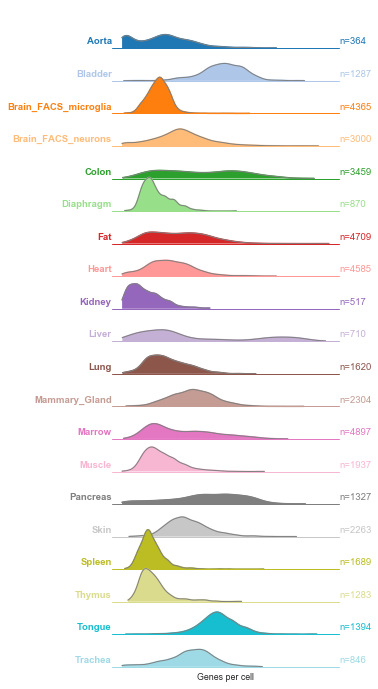

In [16]:
g = hm.horizonplot(x='nGene', **kwargs)
g.set_xlabels('Genes per cell')
for ax in g.axes.flatten():
    if not ax.is_last_row():
        ax.set(xticks=[])
g.savefig(f'{figure1_folder}/horizonplot_genes_per_cell.pdf')

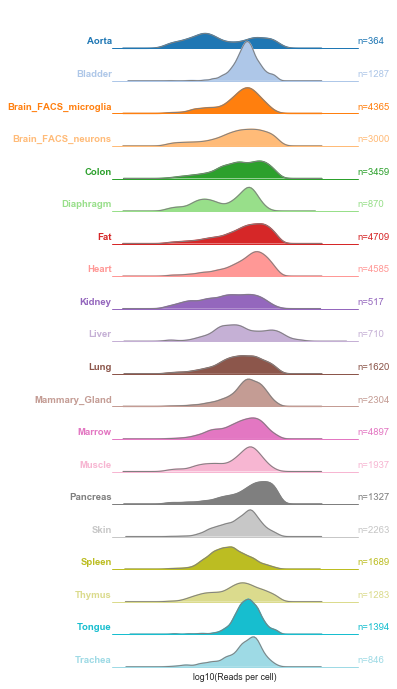

In [17]:
g = hm.horizonplot(x='log10_nReads', **kwargs)
g.set_xlabels('log10(Reads per cell)')
for ax in g.axes.flatten():
    if not ax.is_last_row():
        ax.set(xticks=[])
g.savefig(f'{figure1_folder}/horizonplot_log10_reads_per_cell.pdf')

In [18]:
n_cells_per_tissue = nreads_ngenes.groupby('tissue').size().reset_index()
n_cells_per_tissue = n_cells_per_tissue.rename(columns={0: 'n_cells'})
n_cells_per_tissue

,tissue,n_cells
0,Aorta,364
1,Bladder,1287
2,Brain_FACS_microglia,4365
3,Brain_FACS_neurons,3000
4,Colon,3459
5,Diaphragm,870
6,Fat,4709
7,Heart,4585
8,Kidney,517
9,Liver,710


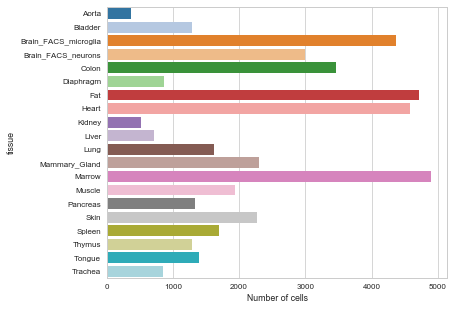

In [19]:
fig, ax = plt.subplots()
sns.barplot(x='n_cells', y='tissue', data=n_cells_per_tissue, palette=colors, order=tissues)
ax.set(xlabel='Number of cells')
fig.tight_layout()
fig.savefig(f'{figure1_folder}/barplot_n_cells_per_tissue.pdf')

In [20]:
n_tissues = len(tissues)
n_tissues

20

In [21]:
pd.Series(tissues)

0                    Aorta
1                  Bladder
2     Brain_FACS_microglia
3       Brain_FACS_neurons
4                    Colon
5                Diaphragm
6                      Fat
7                    Heart
8                   Kidney
9                    Liver
10                    Lung
11           Mammary_Gland
12                  Marrow
13                  Muscle
14                Pancreas
15                    Skin
16                  Spleen
17                  Thymus
18                  Tongue
19                 Trachea
dtype: object

In [22]:
cell_annotations.groupby('tissue').apply(lambda x: len(x.groupby('annotation_subannotation')))

tissue
Aorta                    6
Bladder                  5
Brain_FACS_microglia     2
Brain_FACS_neurons      13
Colon                    8
Diaphragm                5
Fat                     10
Heart                    9
Kidney                   7
Liver                    5
Lung                    17
Mammary_Gland           10
Marrow                  12
Muscle                   6
Pancreas                 9
Skin                     6
Spleen                   6
Thymus                   8
Tongue                   5
Trachea                  6
dtype: int64

width: 2.9921259842400003, height: 10.6299212598


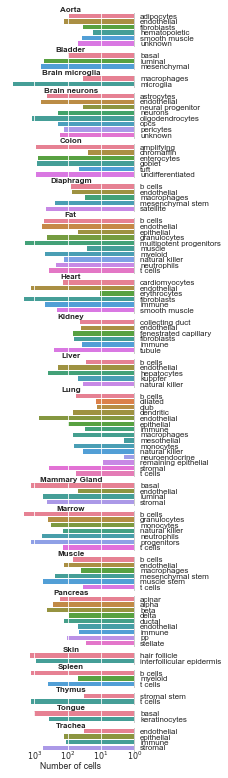

In [71]:
mm_to_inch = 0.03937007874

width = 76 * mm_to_inch
height = 270 * mm_to_inch

print(f'width: {width}, height: {height}')

col = 'annotation'

height_ratios = cell_annotations.groupby('tissue').apply(lambda x: len(x[col].unique()))

fig, axes = plt.subplots(figsize=(width, height), nrows=len(tissues), sharex=True, 
                         gridspec_kw=dict(height_ratios=height_ratios))

for (tissue, df), ax in zip(cell_annotations.groupby('tissue'), axes):
#     print(f'\n--- {tissue} ---')
    annotation_subannotation = np.log10(df.groupby(col).size()).reset_index()
    annotation_subannotation = annotation_subannotation.rename(columns={0: 'n_cells'})
    annotation_subannotation['annotation'] = annotation_subannotation['annotation'].str.replace('_', ' ')
#     print(annotation_subannotation)
#     print(len(annotation_subannotation))
    
    
#     fig, ax = plt.subplots(figsize=(width, height))
    sns.barplot(x='n_cells', y=col, data=annotation_subannotation, palette='husl', ax=ax, zorder=-1)
#     fig.tight_layout()
    ax.set(xlabel='', ylabel='')

    # Remove "FACS"
    tissue = tissue.replace('_FACS', '').replace('_', ' ')
    ax.set_title(tissue, va='top', fontweight='bold', size=8)
    
    ax.yaxis.set_ticks_position("right")
#     ax.set_ylabel(tissue, rotation=0, ha='right')
    
    # only y-axis grid
#     ax.grid(axis='x')
    ax.grid(axis='x', zorder=100, color='white')
    ax.grid('off', axis='y')
    
    ax.spines['left'].set_visible(False)

    if ax.is_last_row():
        
        xticklabels = [f'$10^{int(i)}$' for i in ax.get_xticks()]
        ax.set_xlabel('Number of cells', va='center')
        ax.set_xticklabels(xticklabels, va='center')

    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
        
 
ax.invert_xaxis()
left, right = -0.05, 1.04
bottom, top = -0.015, 1.01
fig.tight_layout(h_pad=-0.1, rect=[left, bottom, right, top])
fig.savefig(f'{figure2_folder}/barplot_n_cells_per_annotation_all.pdf')


In [69]:
annotation_subannotation

,annotation,n_cells
0,endothelial,1.518514
1,epithelial,2.107210
2,immune,2.064458
3,stromal,2.755112


In [36]:
ticklabels = ax.yaxis.get_ticklabels()
ticklabels

<a list of 4 Text major ticklabel objects>

In [39]:
t = ticklabels[0]

In [40]:
t

Text(1,0,'endothelial')

In [41]:
t.get_size()

8.0

In [24]:
import matplotlib

In [25]:
matplotlib.__version__

'2.1.0'

In [26]:
matplotlib.__file__

'/Users/olgabot/anaconda3/envs/maca/lib/python3.6/site-packages/matplotlib/__init__.py'

In [27]:
annotation_subannotation

,annotation,n_cells
0,endothelial,1.518514
1,epithelial,2.107210
2,immune,2.064458
3,stromal,2.755112


In [ ]:
matplotlib.r